In [1]:
import os 
import pandas as pd 
import missingno as mgno
from collections import Counter
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import der Datensätze
os.chdir("Datensätze")

df_aisles = pd.read_csv("aisles.csv.zip")
df_departments = pd.read_csv("departments.csv.zip")
df_orderProducts_s = pd.read_csv("order_products_s.csv.zip")
df_orders_s = pd.read_csv("orders_s.csv.zip")
df_products = pd.read_csv("products.csv.zip")
df_tips = pd.read_csv("tips.csv.zip")

os.chdir("..")

In [3]:
# Merge von Aisles und Departments
df = pd.merge(df_aisles, df_products, on="aisle_id")
df = pd.merge(df_departments, df, on="department_id")

# Wir entfernen die IDs die wir nicht weiter benötigen
df.drop(["department_id","aisle_id"], axis=1, inplace=True)

# Merge auf die OrderProducts
# Damit können wir die folgenden Fragen beantworten:

# -	Welches Department verkauft die meisten Produkte?
# -	Produkte die nicht verkauft werden
# - Anzahl an verkauften Produkten gesamt, Top10 / Top50 / Top100
# - Anzahl an verschieden Produktenarten pro Department, Top10 / Top50 / Top100
# -	Welche Produkte werden gemeinsam gekauft

df_master = pd.merge(df_orderProducts_s, df, on="product_id")
df_master

,order_id,product_id,add_to_cart_order,department,aisle,product_name
0,2,33120,1,dairy eggs,eggs,Organic Egg Whites
1,2,28985,2,produce,fresh vegetables,Michigan Organic Kale
2,2,9327,3,pantry,spices seasonings,Garlic Powder
3,2,45918,4,pantry,oils vinegars,Coconut Butter
4,2,30035,5,pantry,baking ingredients,Natural Sweetener
...,...,...,...,...,...,...
16942231,3421058,6244,4,beverages,soft drinks,Club Soda Lower Sodium
16942232,3421058,6858,5,snacks,crackers,Classic Britannia Crisps
16942233,3421058,30316,6,dairy eggs,packaged cheese,Baby Brie
16942234,3421058,35578,7,meat seafood,packaged meat,Genoa Salame with White Cheddar Cheese & Toast...


In [4]:
# Welches Department verkauft die meisten Produkte (Anzahl)?
product_sold = df_master["department"].value_counts()
product_sold



department
produce            4957175
dairy eggs         2816030
snacks             1509667
beverages          1402323
frozen             1170018
pantry              984550
bakery              613344
canned goods        560188
deli                546160
dry goods pasta     452992
household           386709
breakfast           370020
meat seafood        369467
personal care       233176
babies              218996
international       141130
alcohol              82145
pets                 51742
missing              39026
other                19342
bulk                 18036
Name: count, dtype: int64

# To Do Produktbeliebheit

C:\Users\conta\AppData\Local\Temp\ipykernel_5076\2365468818.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sold_percent.index, y=product_sold_percent.values, palette="viridis")


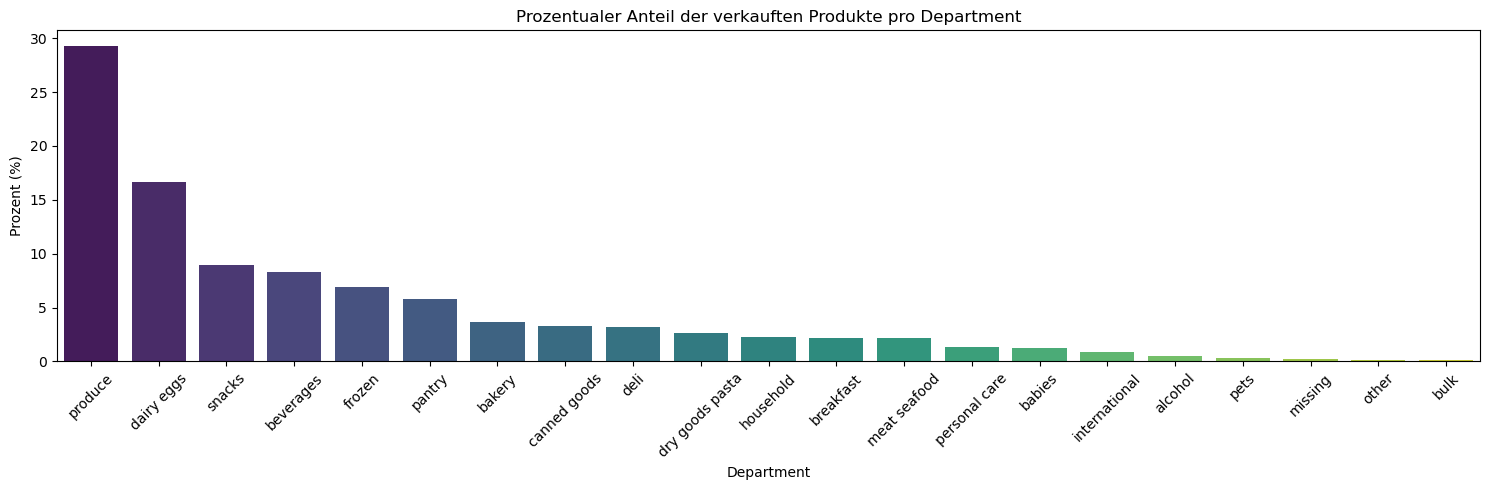

In [ ]:
# Welches Department verkauft die meisten Produkte (Anzahl)?
product_sold = df_master["department"].value_counts()
# Prozentuale Darstellung der verkauften Produkte
product_sold_percent = (product_sold / product_sold.sum()) * 100

# Barplot mit Prozenten
plt.figure(figsize=(15, 5))
sns.barplot(x=product_sold_percent.index, y=product_sold_percent.values, palette="viridis")
plt.xlabel("Department")
plt.ylabel("Prozent (%)")
plt.title("Prozentualer Anteil der verkauften Produkte pro Department")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# TO do Produktbeliebheit

In [6]:
# Produkte die nicht verkauft werden
df_products[~df_products["product_id"].isin(df_master["product_id"])]

,product_id,product_name,aisle_id,department_id
77,78,Nutter Butter Cookie Bites Go-Pak,61,19
79,80,French Tarragon Wine Vinegar,19,13
165,166,Garlic Parmesan Pita Bread Chips,107,19
223,224,Foaming Hand Soap Kid Watermelon,114,17
368,369,New Mexico Chili,30,6
...,...,...,...,...
49481,49482,Black Tea With Vanilla Flavor In Pyramid Bags,100,21
49539,49540,Pure Squeezed Lemonade,31,7
49541,49542,Grapefruit Bergamot Foaming Handwash,6,2
49655,49656,Masada Kosher Pocket Bread,128,3


In [7]:
# Anzahl an verkauften Produkten gesamt, Top10 / Top50 / Top100
n = 10 # Anzahl der Top Produkte
df_master["product_name"].value_counts().head(n)

product_name
Banana                    244850
Bag of Organic Bananas    197298
Organic Strawberries      138445
Organic Baby Spinach      126674
Organic Hass Avocado      111509
Organic Avocado            91565
Large Lemon                80748
Strawberries               74606
Limes                      74107
Organic Raspberries        71330
Name: count, dtype: int64

In [8]:
# Anzahl an verschieden Produktenarten pro Department
productTypesPerDepartment =df_master.groupby("department")["product_id"].nunique().sort_values(ascending=False).head(df_master["department"].nunique())

# To do Abteilungsanalyse

C:\Users\conta\AppData\Local\Temp\ipykernel_5076\801868987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=productTypesPerDepartment.index,y=productTypesPerDepartment.values, palette="viridis")


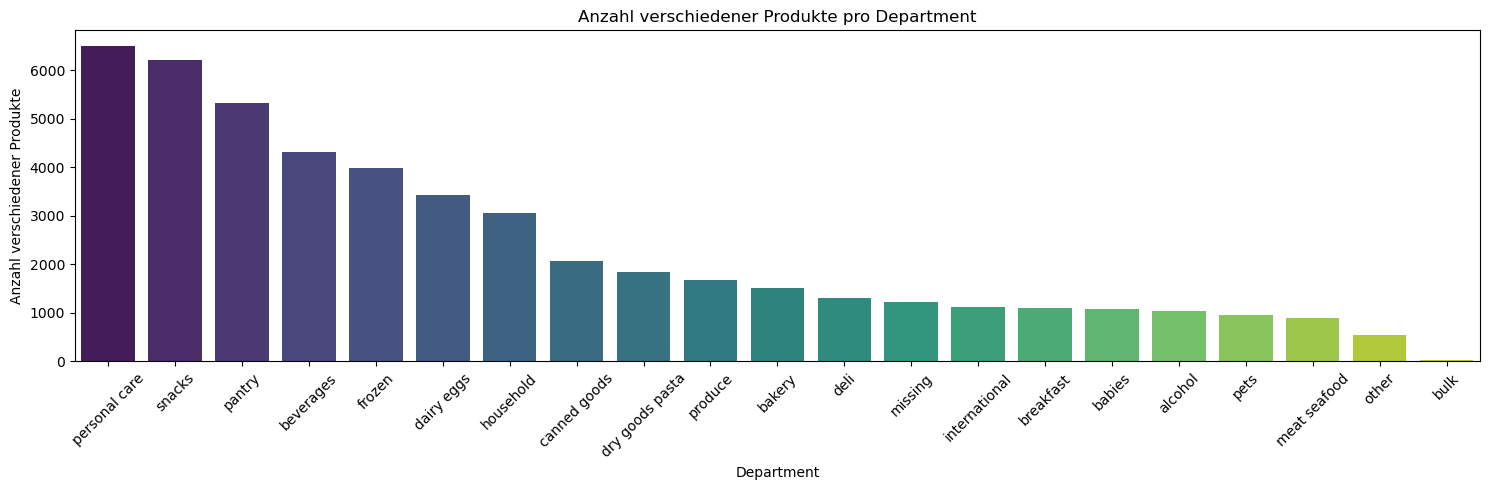

In [ ]:
# Anzahl an verschieden Produktenarten pro Department
productTypesPerDepartment =df_master.groupby("department")["product_id"].nunique().sort_values(ascending=False).head(df_master["department"].nunique())

plt.figure(figsize=(15, 5))
sns.barplot(x=productTypesPerDepartment.index,y=productTypesPerDepartment.values, palette="viridis")
plt.xlabel("Department")
plt.ylabel("Anzahl verschiedener Produkte")
plt.title("Anzahl verschiedener Produkte pro Department")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# TODO sehr Performance-Lastig
# Liste der Produkte pro Bestellung
order_product_groups = df_master.groupby("order_id")["product_id"].apply(list)

# Häufigkeit von gemeinsam gekauften Produkten
pair_counter = Counter()
for products in order_product_groups:
    pairs = combinations(products, 2)
    pair_counter.update(pairs)

# Die 10 häufigsten Produktpaare
n=20
most_common_pairs = pair_counter.most_common(n)
print(f"Die {len(pair_counter)} gesamt an Produktpaaren:")
print(f"Die {n} häufigsten Produktpaare:")
display(most_common_pairs)

Die 35150256 gesamt an Produktpaaren:
Die 20 häufigsten Produktpaare:


[((13176, 21137), 21339),
 ((24852, 21137), 19885),
 ((13176, 47209), 19749),
 ((24852, 21903), 18764),
 ((13176, 21903), 17679),
 ((24852, 47766), 17530),
 ((24852, 16797), 15296),
 ((24852, 47626), 15015),
 ((13176, 27966), 13694),
 ((47209, 13176), 12809),
 ((24852, 28204), 12085),
 ((47209, 21137), 11819),
 ((24852, 26209), 11760),
 ((24852, 49683), 11652),
 ((21137, 13176), 11359),
 ((47209, 21903), 10833),
 ((24852, 47209), 10827),
 ((24852, 45066), 10657),
 ((21137, 21903), 10409),
 ((47766, 24852), 10194)]

C:\Users\conta\AppData\Local\Temp\ipykernel_5076\3288706542.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pairs,y=frequencies, palette="viridis")


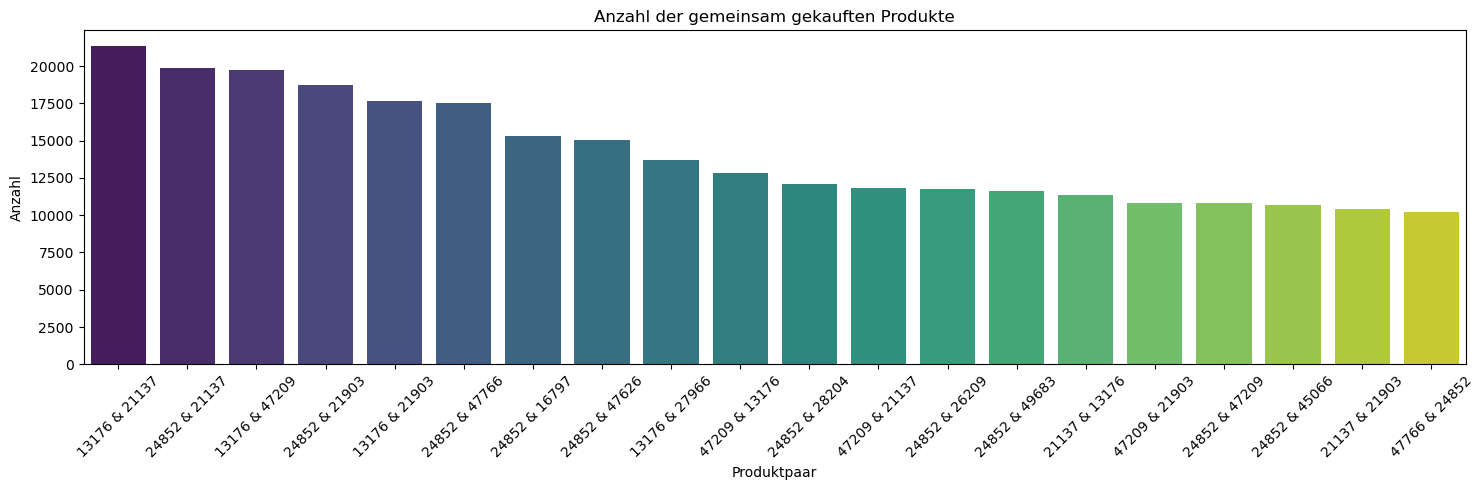

In [11]:
pairs = [f"{pair[0]} & {pair[1]}" for pair, _ in most_common_pairs]  # Kombiniere die Produktnamen als String
frequencies = [count for _, count in most_common_pairs]  # Nur die Häufigkeiten


plt.figure(figsize=(15, 5))
sns.barplot(x=pairs,y=frequencies, palette="viridis")
plt.xlabel("Produktpaar")
plt.ylabel("Anzahl")
plt.title("Anzahl der gemeinsam gekauften Produkte")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# -	Welche Produkte werden zu welcher Uhrzeit gekauft und an welchen Wochentagen?
# -	In welcher Reihenfolge werden die Produkte in den Einkaufswagen gelegt, erstes Produkt aus aisle 1 danach ein Produkt aus aisle 5
# -	Welche Produkte werden am häufigsten zusammen gekauft, wenn ein Produkt aus aisle 1 gekauft wird?

In [13]:
# -	Welche Produkte werden zu welcher Uhrzeit gekauft und an welchen Wochentagen?

# To DO Zeitliche Kauftrends

In [14]:
# Erstellung der DataFrames für die Heatmaps

# Verknüpfen der Daten
merged_data = df_master.merge(df_orders_s, on='order_id')

# Gruppieren nach Produkt, Uhrzeit und Wochentag
product_time_day = merged_data.groupby(['product_name', 'order_hour_of_day', 'order_dow']).size().reset_index(name='purchase_count')

# Sortieren nach Produkt und Anzahl der Käufe (optional)
product_time_day = product_time_day.sort_values(['product_name', 'purchase_count'], ascending=[True, False])

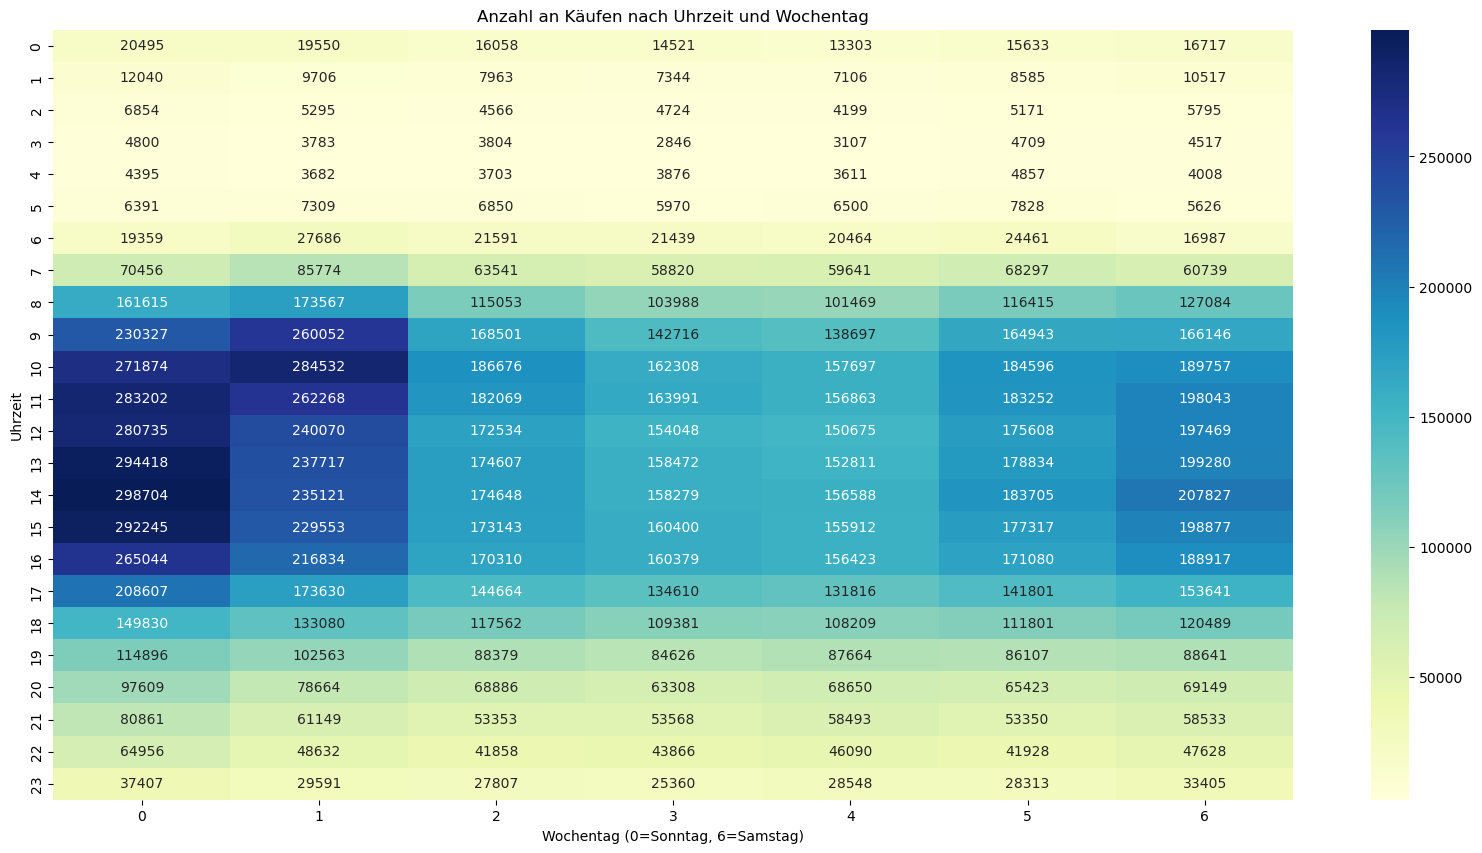

In [15]:
# - Heatmap der Käufe nach Uhrzeit und Wochentag

# Pivot-Tabelle für die Heatmap
heatmap_data = product_time_day.pivot_table(index='order_hour_of_day', columns='order_dow', values='purchase_count', aggfunc='sum')

# Plotten der Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Anzahl an Käufen nach Uhrzeit und Wochentag")
plt.xlabel("Wochentag (0=Sonntag, 6=Samstag)")
plt.ylabel("Uhrzeit")
plt.show()

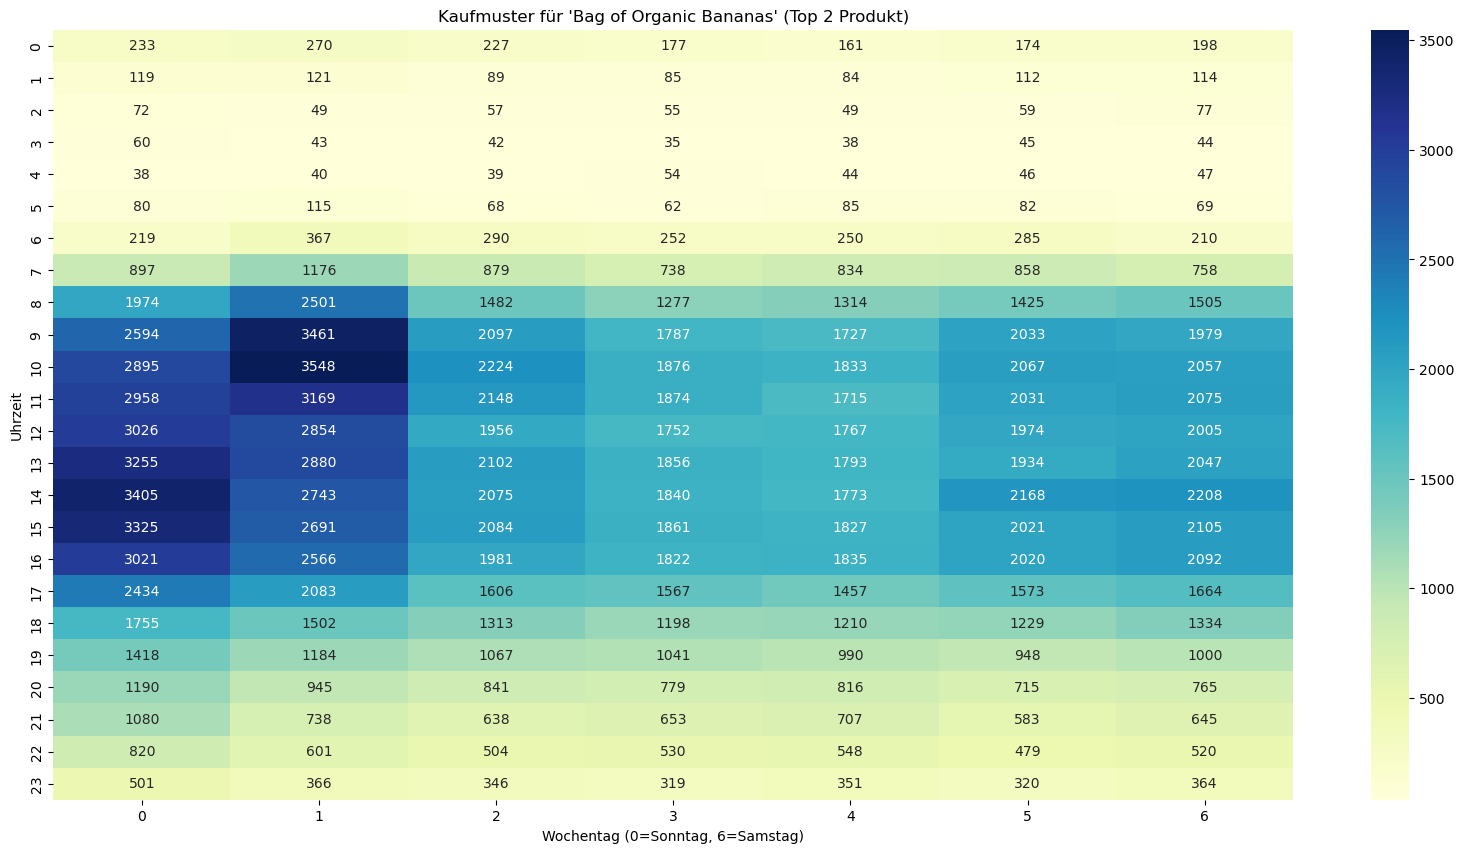

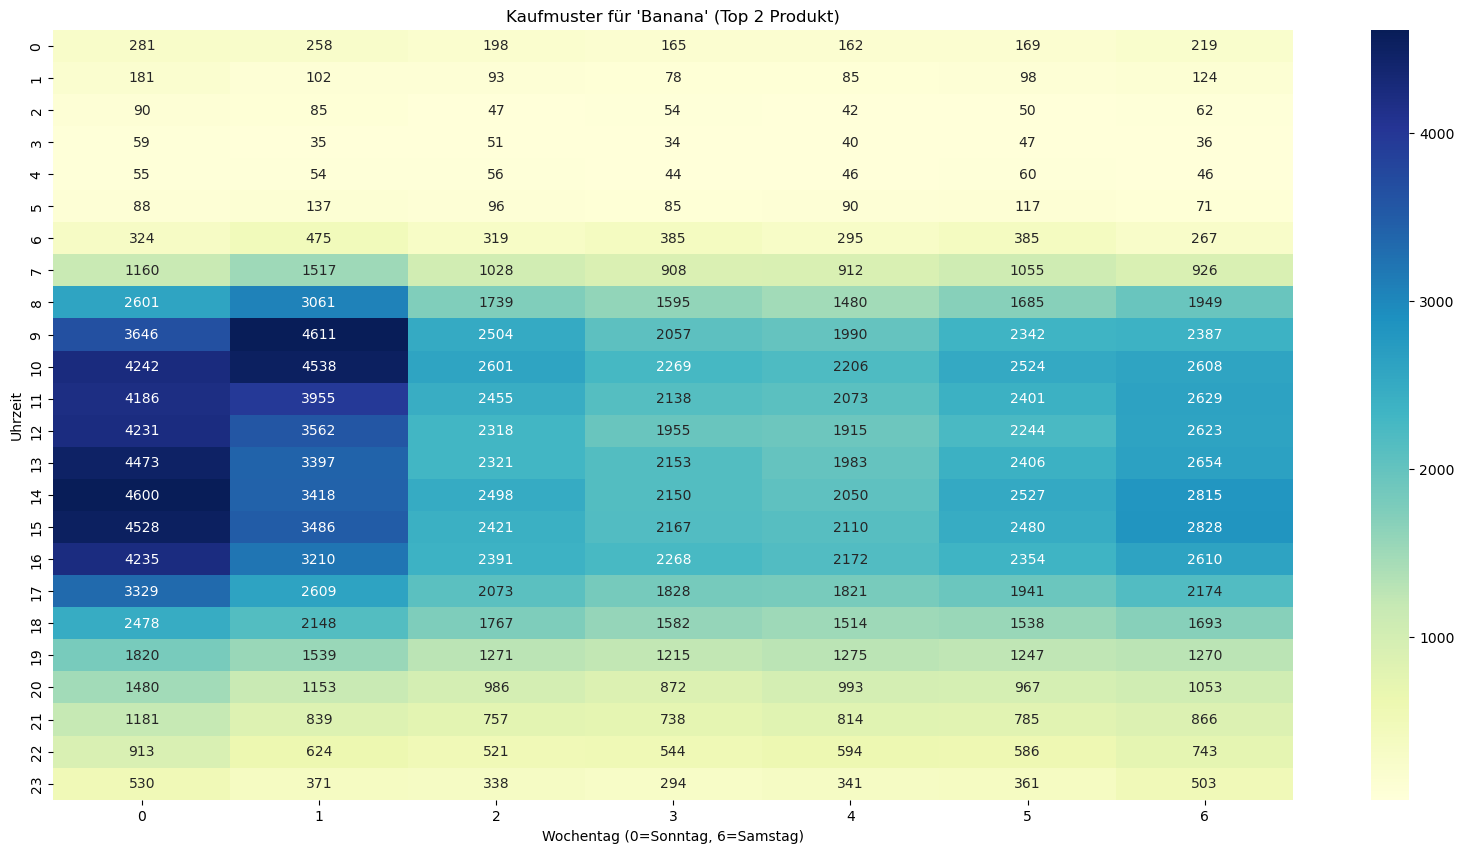

In [25]:
# - Heatmap von Top n Produkten zu welcher Uhrzeit Wochentag sie am meisten gekauft werden
n = 2 # Top 10 Produkte
top_products = df_master["product_id"].value_counts().head(n).index

top_product_data = merged_data[merged_data['product_id'].isin(top_products)]

# Gruppieren nach Produkt, Uhrzeit und Wochentag
top_product_time_day = top_product_data.groupby(['product_name', 'order_hour_of_day', 'order_dow']).size().reset_index(name='purchase_count')

# Erstellen von Heatmaps für jedes Top-Produkt
for product in top_product_time_day['product_name'].unique():
    # Filtern der Daten für das spezifische Produkt
    product_data = top_product_time_day[top_product_time_day['product_name'] == product]
    
    # Pivot-Tabelle für die Heatmap
    heatmap_data = product_data.pivot_table(
        index='order_hour_of_day', 
        columns='order_dow', 
        values='purchase_count', 
        aggfunc='sum'
    )
    
    # Plotten der Heatmap
    plt.figure(figsize=(20, 10))
    sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f")
    plt.title(f"Kaufmuster für '{product}' (Top {n} Produkt)")
    plt.xlabel("Wochentag (0=Sonntag, 6=Samstag)")
    plt.ylabel("Uhrzeit")
    plt.show()

In [17]:
# -	In welcher Reihenfolge werden die Produkte in den Einkaufswagen gelegt, erstes Produkt aus aisle 1 danach ein Produkt aus aisle 5

In [18]:
merged_data

,order_id,product_id,add_to_cart_order,department,aisle,product_name,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,dairy eggs,eggs,Organic Egg Whites,202279,3,5,9,8.0
1,2,28985,2,produce,fresh vegetables,Michigan Organic Kale,202279,3,5,9,8.0
2,2,9327,3,pantry,spices seasonings,Garlic Powder,202279,3,5,9,8.0
3,2,45918,4,pantry,oils vinegars,Coconut Butter,202279,3,5,9,8.0
4,2,30035,5,pantry,baking ingredients,Natural Sweetener,202279,3,5,9,8.0
...,...,...,...,...,...,...,...,...,...,...,...
16942231,3421058,6244,4,beverages,soft drinks,Club Soda Lower Sodium,136952,20,3,18,15.0
16942232,3421058,6858,5,snacks,crackers,Classic Britannia Crisps,136952,20,3,18,15.0
16942233,3421058,30316,6,dairy eggs,packaged cheese,Baby Brie,136952,20,3,18,15.0
16942234,3421058,35578,7,meat seafood,packaged meat,Genoa Salame with White Cheddar Cheese & Toast...,136952,20,3,18,15.0


In [19]:
# -	Welche Produkte werden am häufigsten zusammen gekauft, wenn ein Produkt aus aisle 1 gekauft wird?

In [20]:
# -	Bei welchen Produkten wird Trinkgeld gegeben

merged_data = merged_data.merge(df_tips, on='order_id')
merged_data.groupby("order_id")["tip"].sum()


order_id
1           0
2           0
4          13
5          26
8           0
           ..
3421073     0
3421077     4
3421079     1
3421080     0
3421081     0
Name: tip, Length: 1673021, dtype: int64

In [21]:
# -	Durchschnittliche Anzahl an Produkten im Einkaufswagen pro Tag / gesamt
# -	Geben Kunden mehr Trinkgeld, wenn gewisse Produkte im Warenkorb sind
# -	Bei welchen Produkten wird Trinkgeld gegeben 
# -	Die Departements /aisles / Produkte mit dem höchsten Trinkgeld
# -	Trinkgeld pro Department / aisle / Produkt
# -	Haben benachbarte aisles von aisles mit hohen Trinkgeld auch ein erhöhtes Trinkgeld?

# To do Dispostion

In [22]:
# - Anzahl der Tips gesamt pro n Produkt
n = 10
# Filtere Bestellungen mit Trinkgeld (tip == True)
orders_with_tips = merged_data[merged_data["tip"] == True]

# Gruppiere nach Produkt und summiere das Trinkgeld
product_tips = orders_with_tips.groupby("product_name")["tip"].sum().reset_index()

# Sortiere die Produkte nach dem Trinkgeldbetrag, um zu sehen, welche am meisten Trinkgeld erhalten haben
product_tips_sorted = product_tips.sort_values("tip", ascending=False)

# Zeige die Ergebnisse
product_tips_sorted.head(n)


,product_name,tip
3392,Banana,139711
3199,Bag of Organic Bananas,112189
29658,Organic Strawberries,66770
26701,Organic Baby Spinach,59188
28103,Organic Hass Avocado,53043
26666,Organic Avocado,42726
30195,Organic Whole Milk,38532
20757,Large Lemon,36847
29125,Organic Raspberries,34936
39857,Strawberries,34099


# To do Dispostion

C:\Users\conta\AppData\Local\Temp\ipykernel_5076\1726958158.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_tips_sorted["product_name"].head(n), y=product_tips_sorted["tip"].head(n), palette="viridis")


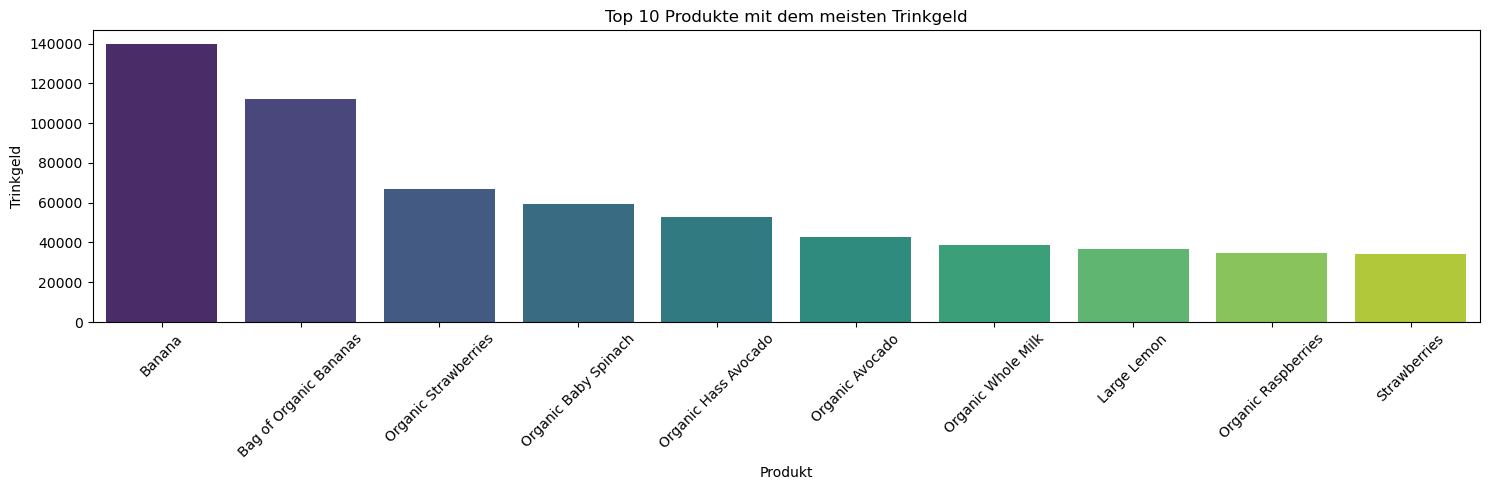

In [29]:
n = 10
plt.figure(figsize=(15, 5))
sns.barplot(x=product_tips_sorted["product_name"].head(n), y=product_tips_sorted["tip"].head(n), palette="viridis")
plt.xlabel("Produkt")
plt.ylabel("Trinkgeld")
plt.title(f"Top {n} Produkte mit dem meisten Trinkgeld")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# To do Disposition

Eine Grafik vielleicht noch machen ? 

In [31]:
# 1. Summiere die Tipps pro Department
tips_per_department = orders_with_tips.groupby("department")["tip"].sum()

# 2. Zähle die Anzahl der Produkte pro Department
products_per_department = df_master.groupby("department")["product_id"].nunique()

# 3. Kombiniere beide Ergebnisse in einen DataFrame
department_summary = pd.DataFrame({
    "total_amount_of_tips": tips_per_department,
    "product_count": products_per_department
}).sort_values(by=["total_amount_of_tips", "product_count"], ascending=[False, False])


# Zeige die Ergebnisse
department_summary


,total_amount_of_tips,product_count
department,,
produce,2330380,1678
dairy eggs,1383079,3425
snacks,632036,6209
beverages,538026,4320
frozen,402988,3979
pantry,374659,5323
bakery,238201,1510
deli,231456,1313
canned goods,209170,2074
